## Learning Outcomes
In this project, we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Task 1: Analyzing a Sample from the Population

In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline

In [17]:
# Load dataset
sample_df = pd.read_csv('run10sample.csv')

# Get mean finishing time
sample_mean_time = sample_df['time'].mean()

# Print the result
print(f'The mean finishing time in the random sample is: {sample_mean_time}')

The mean finishing time in the random sample is: 98.1504


In [3]:
# Grouping men and women
grouped = sample_df.groupby(sample_df['gender'])
female_group = grouped.get_group('F')
male_group = grouped.get_group('M')

# Get the number of female and male
nfemale = female_group.count()
nmale = male_group.count()

# Print result
print(f"The number of women: {nfemale[0]}\nThe number of men: {nmale[0]}")

The number of women: 14
The number of men: 11


In [4]:
# Spliting the sample up by gender
time_by_gender = sample_df['time'].groupby(sample_df['gender'])

# Get mean finishing time
time_by_gender_mean = time_by_gender.mean()

# Print result
print(time_by_gender_mean)

gender
F    103.496429
M     91.346364
Name: time, dtype: float64


## Task 2: Resampling from the Population

In [16]:
# Load dataset
pop_df = pd.read_csv('run10.csv')

# Get mean finishing time
pop_mean_time = pop_df['time'].mean()

# Print the result
print(f'The mean finishing time in the whole population of runners is: {round(pop_mean_time,3)}')

The mean finishing time in the whole population of runners is: 94.516


In [18]:
# To see whether the difference can be explained by the differences in gender distribution between the sample
# and the population, we will calculate the proportion of male and female runners
dfByGenderP = pop_df['time'].groupby(pop_df['gender'])
dfByGenderS = sample_df['time'].groupby(sample_df['gender'])
print('********** total number of male and female runners in the population **********')
print(dfByGenderP.count(), '\n')
print('********** total number of male and female runners in the sample **********')
print(dfByGenderS.count(), '\n')

# Calculating the total number of runners in the population and the sample
# Alternatively, you could just calculate the ratio of the female runners in both the population and the sample
# by using the outputs of the groupby (as printed in the output)
totalNP = (dfByGenderP.get_group('F').count()) + (dfByGenderP.get_group('M').count())
totalNS = (dfByGenderS.get_group('F').count()) + (dfByGenderS.get_group('M').count())
print('The total number of runners in the population is %s' % totalNP)
print('The total number of runners in the sample is %s \n\n' % totalNS)

# Calculating female and male proportions in the population and the sample
# Population
fRatioP = (dfByGenderP.get_group('F').count())/totalNP
print('The female ratio in the population is %.4f' % fRatioP)

# Sample
fRatioS = (dfByGenderS.get_group('F').count())/totalNS
print('The female ratio in the sample is %.4f\n\n' % fRatioS)


# To see whether the difference can be explained by the differences in age distribution between the sample
# and the population, we will calculate the mean age for the population and the sample
print('the mean age of the runners in the population is %.3f' % pop_df['age'].mean())
print('the mean age of the runners in the sample is %.3f' % sample_df['age'].mean())

********** total number of male and female runners in the population **********
gender
F    9732
M    7191
Name: time, dtype: int64 

********** total number of male and female runners in the sample **********
gender
F    14
M    11
Name: time, dtype: int64 

The total number of runners in the population is 16923
The total number of runners in the sample is 25 


The female ratio in the population is 0.5751
The female ratio in the sample is 0.5600


the mean age of the runners in the population is 35.521
the mean age of the runners in the sample is 37.040


The mean finishing time of the population and the sample are 94.516 and 98.1504, respectively. So the mean finishing time of the sample is ~3.63 higher than that of the population. We can see that the proportion of women in the population and the sample are roughly the same. On the other hand, the mean age of runners in the sample is about 1.52 years higher than that of the population. So we can conclude that the differences in the age distribution can explain the difference between the mean finishing times of the sample and the population, since older people tend to run slower. To improve the estimates, we probably should have used a stratifed sample to make the gender distribution and the age distribution equal to the population.

In [9]:
# Write a function bootstrap, which takes a data series (data) as an input and then performs a bootstrap
def bootstrap(data, N, fcn, numIter = 1000):
    # Create empty sample distribution
    sample_dist = np.zeros([1, numIter])
    
    # Calculate the statistics for each iteration and record it in a np array
    for i in range(numIter):
        # Sampling from data
        #print("num iteration:", i)
        samps_temp = np.random.choice(data, size = N, replace = True)
        #print("samps_temp:\n", samps_temp)
        sample_dist[:,i] = fcn(samps_temp)
        #print("sampe dist:", sample_dist)
    
    # Return the result
    return sample_dist

Mean of the resampled estimates: 94.363466
Standard deviation of the resampled estimates: 3.098260925377977


Text(0, 0.5, 'Count')

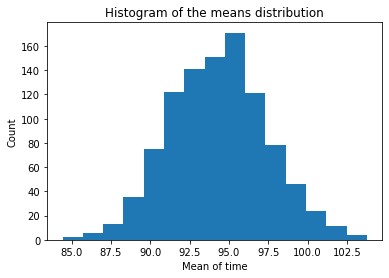

In [10]:
# Call the resample function with time from the whole population, mean as statistic, sample size of 25
result = bootstrap(pop_df['time'], 25, np.mean)

# Report the mean and the standard deviation of the resampled estimates
print(f"Mean of the resampled estimates: {np.mean(result)}\nStandard deviation of the resampled estimates: {np.std(result)}")

# Plot a histogram of the samples
plt.hist(result.reshape(-1,1), bins = 15)
plt.title('Histogram of the means distribution')
plt.xlabel('Mean of time')
plt.ylabel('Count')

In [13]:
# Calculating the mean of the distribution using sample size of 50
statDist50 = bootstrap(pop_df['time'], 50, np.mean)
statMean50 = statDist50.mean()
statStd50  = statDist50.std()
print('The mean of the mean distribution using sample size of 50 is %.3f' % statMean50)
print('The std of the mean distribution using sample size of 50 is %.3f\n\n' % statStd50)

# Calculating the mean of the distribution using sample size of 100
statDist100 = bootstrap(pop_df['time'], 100, np.mean)
statMean100 = statDist100.mean()
statStd100  = statDist100.std()
print('The mean of the mean distribution using sample size of 100 is %.3f' % statMean100)
print('The std of the mean distribution using sample size of 100 is %.3f' % statStd100)

The mean of the mean distribution using sample size of 50 is 94.534
The std of the mean distribution using sample size of 50 is 2.241


The mean of the mean distribution using sample size of 100 is 94.605
The std of the mean distribution using sample size of 100 is 1.577


The mean of the distribution stays roughly the same (close to the population mean). However, the standard deviation decreases as we increase the sample size. That's because by increasing the sample size, we are including more data points in out estimates, hence the standard deviation of the stat decreases.

In [15]:
# Calculate the predicted standard error of the mean from the population standard deviation and the same size for N=25, N=50, and N=100
print('The predicted SEM for N=25 samples is', pop_df['time'].std()/np.sqrt(25))
print('The predicted SEM for N=50 samples is', pop_df['time'].std()/np.sqrt(50))
print('The predicted SEM for N=100 samples is', pop_df['time'].std()/np.sqrt(100))

The predicted SEM for N=25 samples is 3.1844251740179077
The predicted SEM for N=50 samples is 2.251728634729214
The predicted SEM for N=100 samples is 1.5922125870089539


The predicted SEMs very tightly match the empricial ones.

## Task 3: Calculating Confidence Intervals

In [20]:
# Write a function (confidenceInt) that determines a confidence interval for a data series
def confidenceInt(data, prec):
    # Get lower bound
    lower = (100-prec)/2
    
    # Get upper bound
    upper = 100 - lower
    
    # Get specific percentile of the data
    ci = np.percentile(data, [lower, upper]) 
    
    # Return confidence interval
    return ci

In [21]:
# Use bootstrap function above to generate 1000 artificial samples of 25. 
samples25 = bootstrap(pop_df['time'], 25, np.mean)
#print(result.shape)

# Determine the confidence 95% interval for the mean estimate of sample of 25
ci = confidenceInt(samples25, 95)

# Report the interval
print(f"The confidence 95% interval for the mean estimate of sample of 25 is {ci}")

The confidence 95% interval for the mean estimate of sample of 25 is [ 88.26902 101.03253]


[ 88.55473 100.52603]


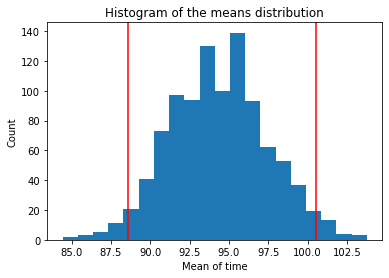

In [26]:
# Repeat the plotting of the histogram from task 2
plt.hist(result.reshape(-1,1), bins = 20)
plt.title('Histogram of the means distribution')
plt.xlabel('Mean of time')
plt.ylabel('Count')

# Get confidence interval
ci = confidenceInt(result, 95)
print(ci)

# Plot the lower and upper bound of the confidence interval
plt.axvline(x = ci[0], color = 'red')
plt.axvline(x = ci[1], color = 'red')

## Task 4: Bootstraping from the Sample

In [27]:
# Load the sample stored in run10sample.csv. 
sample_df = pd.read_csv('run10sample.csv')

# Call the bootstrap with the time, 25 data points, 1000 bootstrap samples
result_25 = bootstrap(sample_df['time'], 25, np.mean, 1000)

# Report the mean of the bootstrap samples, the standard deviation of the samples, the 95% confidence interval
print(f"The mean of the bootstrap samples is {np.mean(result_25)}")
print(f"The standard deviation of the samples is {np.std(result_25)}")

# Get confidence interval
ci_25 = confidenceInt(result_25, 95)

# Print c.i.
print(f"The 95% confidence interval is {ci_25}")

The mean of the bootstrap samples is 98.2795288
The standard deviation of the samples is 2.894176794663823
The 95% confidence interval is [ 92.61197 103.991  ]


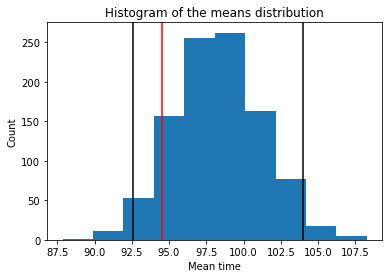

In [28]:
# Plot of the histogram of bootstrap samples
plt.hist(result_25.reshape(-1,1))
plt.title('Histogram of the means distribution')
plt.xlabel('Mean time')
plt.ylabel('Count')

# Plot the lower and upper bound of the confidence interval
plt.axvline(x = ci_25[0], color = 'black')
plt.axvline(x = ci_25[1], color = 'black')

# Plot the true population mean
plt.axvline(x = pop_mean_time, color = 'red')

Both the population mean and the time for last year's are included in the confidence interval. Thus there is no statstical evidence from our sample, that the race has gotten faster.